# Libraries

In [ ]:
from google.colab import drive
import numpy as np
import os as os
import pandas as pd
import seaborn as sns

import random
random.seed(0) # pick your seed

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer

# Data

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  drive.mount('/content/gdrive', force_remount=True)
  dir = os.path.join('gdrive', 'My Drive', 'Eurostat', '02 - Data Science for Structured Data')
  data_dir = os.path.join(dir, 'data')
  os.system('cd "gdrive${dir}" && mkdir -p data')
else:
  data_dir = "." 

Mounted at /content/gdrive


In [ ]:
df_iris = pd.read_csv(os.path.join(data_dir, 'iris.csv'),
                      header=None,
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
df_iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,class
91,6.1,3.0,4.6,1.4,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa
133,6.3,2.8,5.1,1.5,Iris-virginica


In [ ]:
df_pima = pd.read_csv(os.path.join(data_dir, 'pima.csv'),
                      header=8,
                      names = ['preg', 'gluc', 'pres', 'skin' ,'insu', 'bmi', 'pedi', 'age', 'class'])
df_pima.sample(3)

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
621,2,92,76,20,0,24.2,1.698,28,0
176,6,85,78,0,0,31.2,0.382,42,0
488,4,99,72,17,0,25.6,0.294,28,0


In [ ]:
df_wine = pd.read_csv(os.path.join(data_dir, 'wine.csv'), 
                      sep=';')
df_wine.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1486,6.8,0.68,0.21,2.1,0.070,9.0,23.0,0.99546,3.38,0.60,10.3,5
1354,7.2,0.58,0.03,2.3,0.077,7.0,28.0,0.99568,3.35,0.52,10.0,5
1487,6.0,0.64,0.05,1.9,0.066,9.0,17.0,0.99496,3.52,0.78,10.6,5


In [ ]:
df_housing = pd.read_csv(os.path.join(data_dir, 'housing.csv'))
df_housing.sample(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74,18.5
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8


In [ ]:
df_happiness = pd.read_csv(os.path.join(data_dir, 'happiness.csv'))
df_happiness.sample(3)

,isced11,sex,age,geo,time,ACCSAT,COMSAT,FINSAT,GREENSAT,JOBSAT,LIFESAT,LIVENVSAT,MEANLIFE,RELSAT,TIMESAT
855,ED3_4,F,Y35-49,DE,2018,NaN,NaN,6.5,NaN,7.0,7.4,NaN,NaN,7.8,6.0
1827,ED5-8,M,Y25-34,LU,2018,NaN,NaN,7.4,NaN,7.3,7.8,NaN,NaN,7.7,6.9
987,ED3_4,F,Y65-74,BE,2013,8.3,NaN,7.2,7.9,NaN,7.6,7.8,7.9,7.9,7.7


# Transforms

## Scaling
Useful for:
- Optimization algorithms used in the core of machine learning algorithms like _gradient descent_. 
- ML algorithms that weight inputs like _regression_ and _neural networks_.
- ML algorithms that use distance measures like _k-Nearest Neighbors_.

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


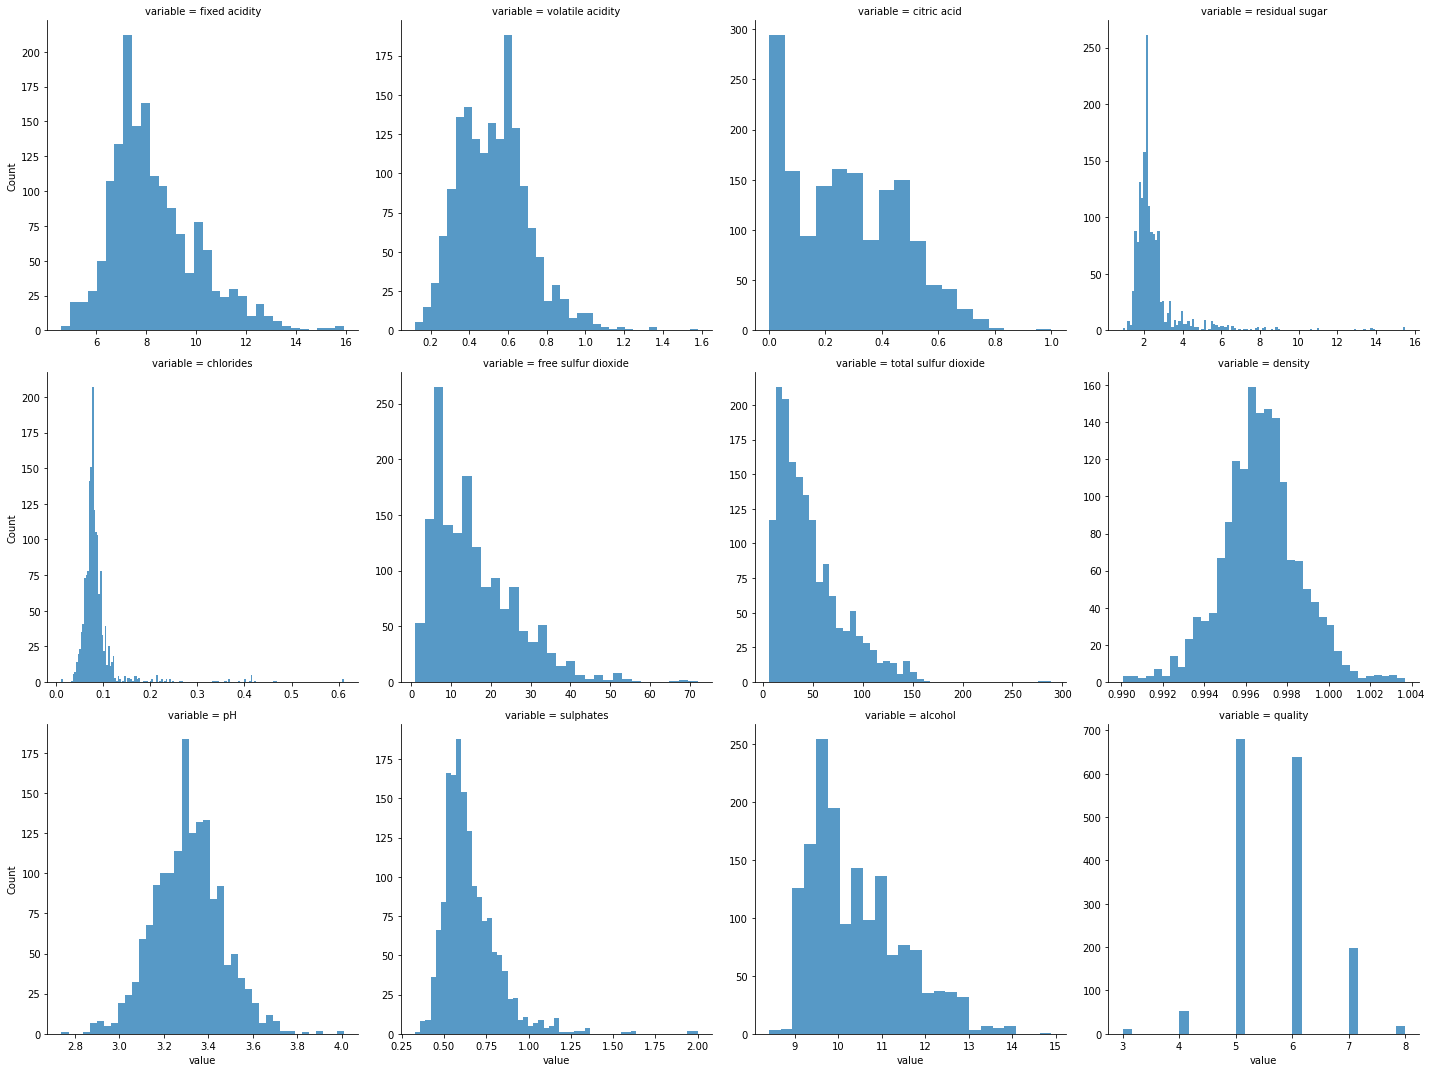

In [ ]:
sns.displot(data=df_wine.melt(),
            x='value',
            kind='hist',
            col='variable',
            col_wrap=4,
            common_bins=False,
            facet_kws=dict(sharex=False, sharey=False))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_wine_scaled = pd.DataFrame(scaler.fit_transform(df_wine),
                              columns=df_wine.columns,
                              index=df_wine.index)

df_wine_scaled.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
402,0.672566,0.246575,0.54,0.116438,0.121870,0.253521,0.204947,0.729075,0.283465,0.167665,0.323077,0.6
1384,0.221239,0.434932,0.15,0.061644,0.158598,0.267606,0.275618,0.430250,0.354331,0.101796,0.169231,0.4
19,0.292035,0.136986,0.51,0.061644,0.549249,0.225352,0.176678,0.501468,0.236220,0.449102,0.123077,0.6
959,0.300885,0.321918,0.05,0.075342,0.128548,0.154930,0.091873,0.534508,0.488189,0.167665,0.246154,0.4
1294,0.318584,0.352740,0.10,0.082192,0.101836,0.338028,0.190813,0.463289,0.433071,0.251497,0.384615,0.6


In [ ]:
df_wine_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


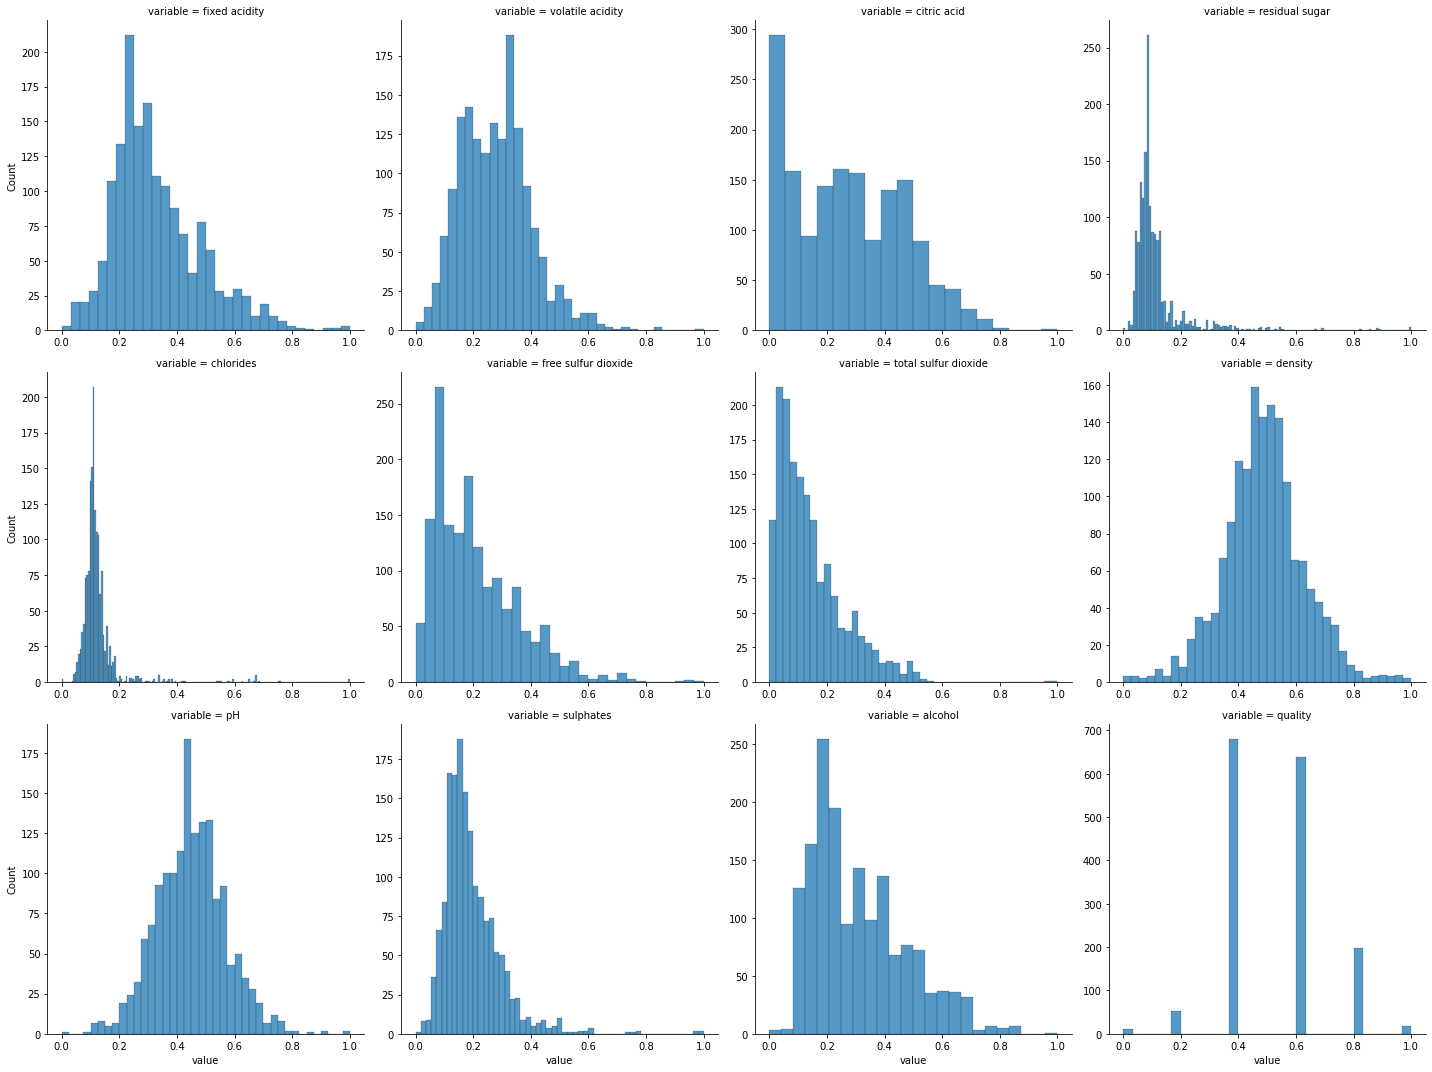

In [ ]:
sns.displot(data=df_wine_scaled.melt(),
            x='value',
            kind='hist',
            col='variable',
            col_wrap=4,
            common_bins=False,
            facet_kws=dict(sharex=False, sharey=False))

In [ ]:
scaler.scale_

array([8.84955752e-02, 6.84931507e-01, 1.00000000e+00, 6.84931507e-02,
       1.66944908e+00, 1.40845070e-02, 3.53356890e-03, 7.34214391e+01,
       7.87401575e-01, 5.98802395e-01, 1.53846154e-01, 2.00000000e-01])

## Standardization
Removes average, enforces unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_wine_standardized = pd.DataFrame(scaler.fit_transform(df_wine),
                              columns=df_wine.columns,
                              index=df_wine.index)

df_wine_standardized.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
468,1.769762,-0.937525,2.151710,-0.311323,0.053845,-0.944346,-0.774449,1.724305,-0.914312,-0.225128,-1.147981,0.450848
1291,-0.068735,0.598756,-0.877968,-0.311323,-0.307468,0.872638,0.411500,-0.194345,-0.136798,0.542042,0.447763,0.450848
546,-0.470907,0.123905,-0.159061,-0.382271,-0.201199,-0.561823,-0.561586,0.823281,0.899886,0.719081,-0.866379,0.450848
701,-0.758172,0.682553,-1.288771,-0.311323,-0.456244,-0.753085,-0.652813,0.240266,1.029472,0.069937,-0.866379,0.450848
1420,-0.298547,0.012176,-1.340122,-0.666062,-0.222453,-1.231239,-0.835267,-0.925764,-0.979104,-1.169337,-0.584777,-0.787823


In [ ]:
df_wine_standardized.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,4.838739e-16,1.432042e-16,1.289532e-16,2.336509e-14,3.002879e-15,7.639596e-16,9.437243e-16,-8.051373e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,-3.265165e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,-7.878226e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,4.508484e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,4.508484e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,2.928190e+00


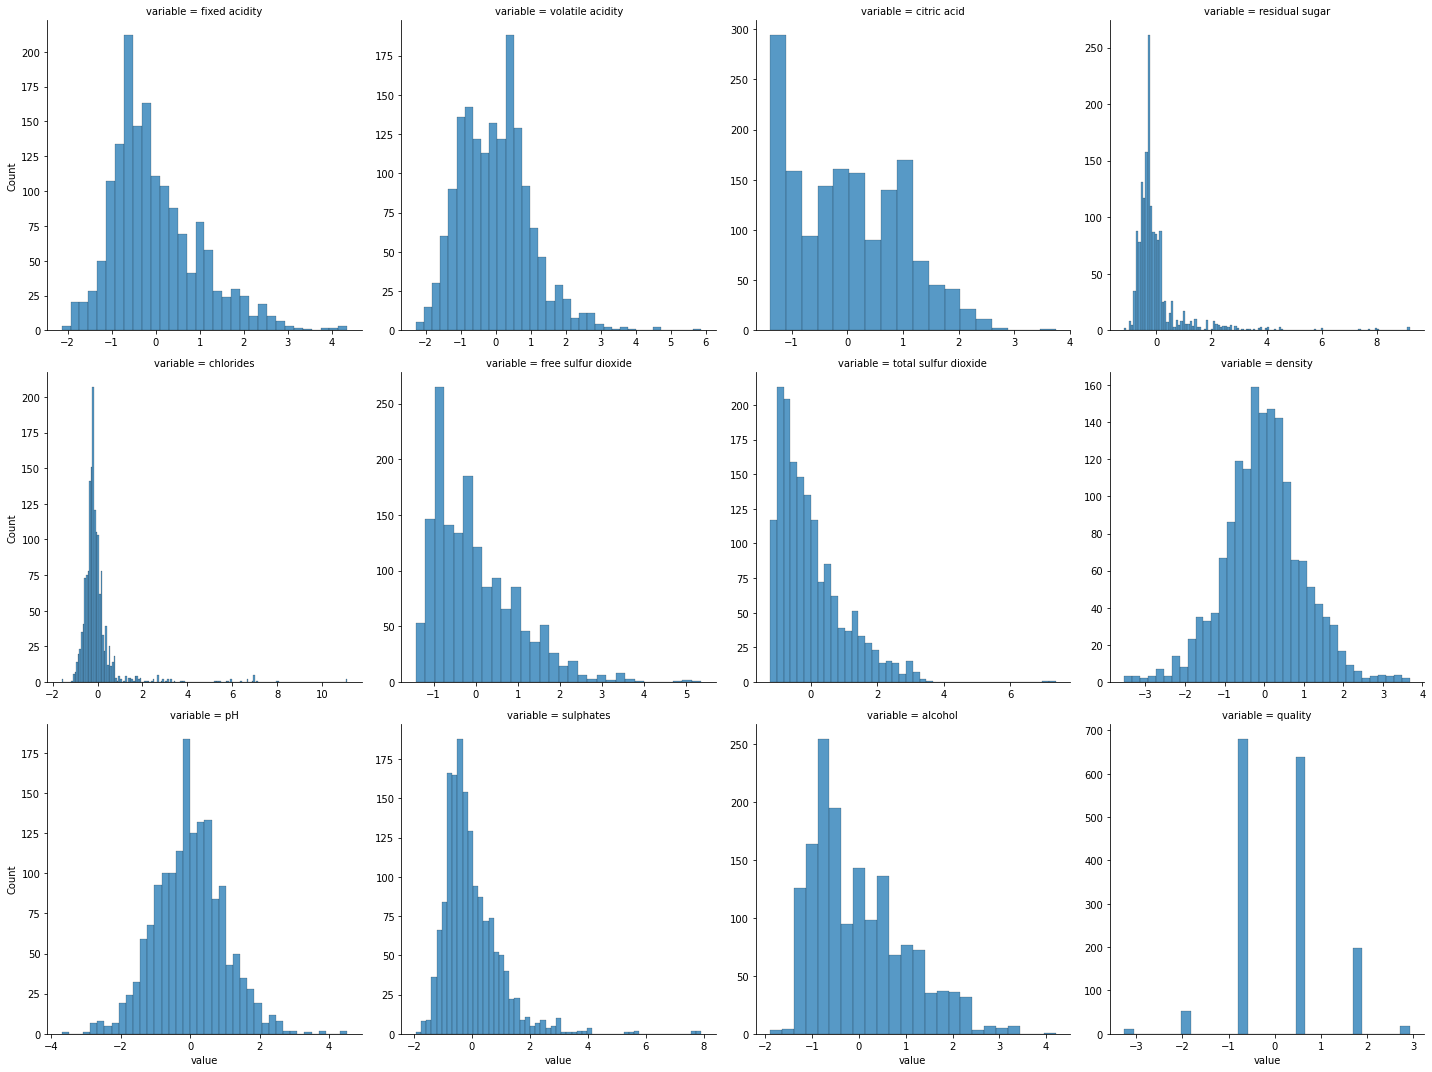

In [ ]:
sns.displot(data=df_wine_standardized.melt(),
            x='value',
            kind='hist',
            col='variable',
            col_wrap=4,
            common_bins=False,
            facet_kws=dict(sharex=False, sharey=False))

## Normalization
Refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra).

Useful for **sparse datasets** (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as _neural networks_ and algorithms that use distance
measures such as _k-Nearest Neighbors_.

In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
df_wine_unitnorm = pd.DataFrame(scaler.fit_transform(df_wine),
                                  columns=df_wine.columns,
                                  index=df_wine.index)

df_wine_unitnorm.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1574,0.057830,0.003201,0.008055,0.143541,0.000764,0.237515,0.950058,0.010293,0.035008,0.004957,0.108431,0.061960
369,0.365898,0.010510,0.020630,0.093421,0.002880,0.233552,0.700655,0.038777,0.124561,0.043986,0.467103,0.272477
884,0.114542,0.007940,0.002473,0.052065,0.001224,0.390485,0.898115,0.012988,0.041912,0.006508,0.130162,0.078097
530,0.283848,0.006862,0.007486,0.065503,0.002433,0.031192,0.873379,0.031161,0.106365,0.027137,0.321279,0.187153
615,0.123364,0.007710,0.006425,0.029556,0.001015,0.359811,0.912379,0.012847,0.044976,0.007325,0.124649,0.064252


In [ ]:
df_wine_unitnorm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.215313,0.013444,0.006922,0.062610,0.002210,0.305282,0.823186,0.025545,0.084877,0.016670,0.269655,0.145597
std,0.123825,0.009042,0.006969,0.043870,0.001614,0.114296,0.127156,0.013206,0.044087,0.009074,0.146528,0.079768
min,0.027054,0.001027,0.000000,0.007761,0.000112,0.021607,0.325111,0.003401,0.010308,0.001747,0.042122,0.023972
25%,0.114058,0.007056,0.001896,0.033486,0.001156,0.218865,0.759075,0.014536,0.048592,0.009351,0.149010,0.078805
50%,0.183688,0.011177,0.004321,0.052861,0.001865,0.291105,0.849563,0.023041,0.076643,0.014783,0.241074,0.130899
75%,0.296968,0.017290,0.010001,0.077837,0.002762,0.382126,0.919613,0.035081,0.116043,0.022927,0.372155,0.200347
max,0.661059,0.089465,0.035993,0.480944,0.018949,0.618892,0.989920,0.062126,0.209330,0.057165,0.710668,0.395291


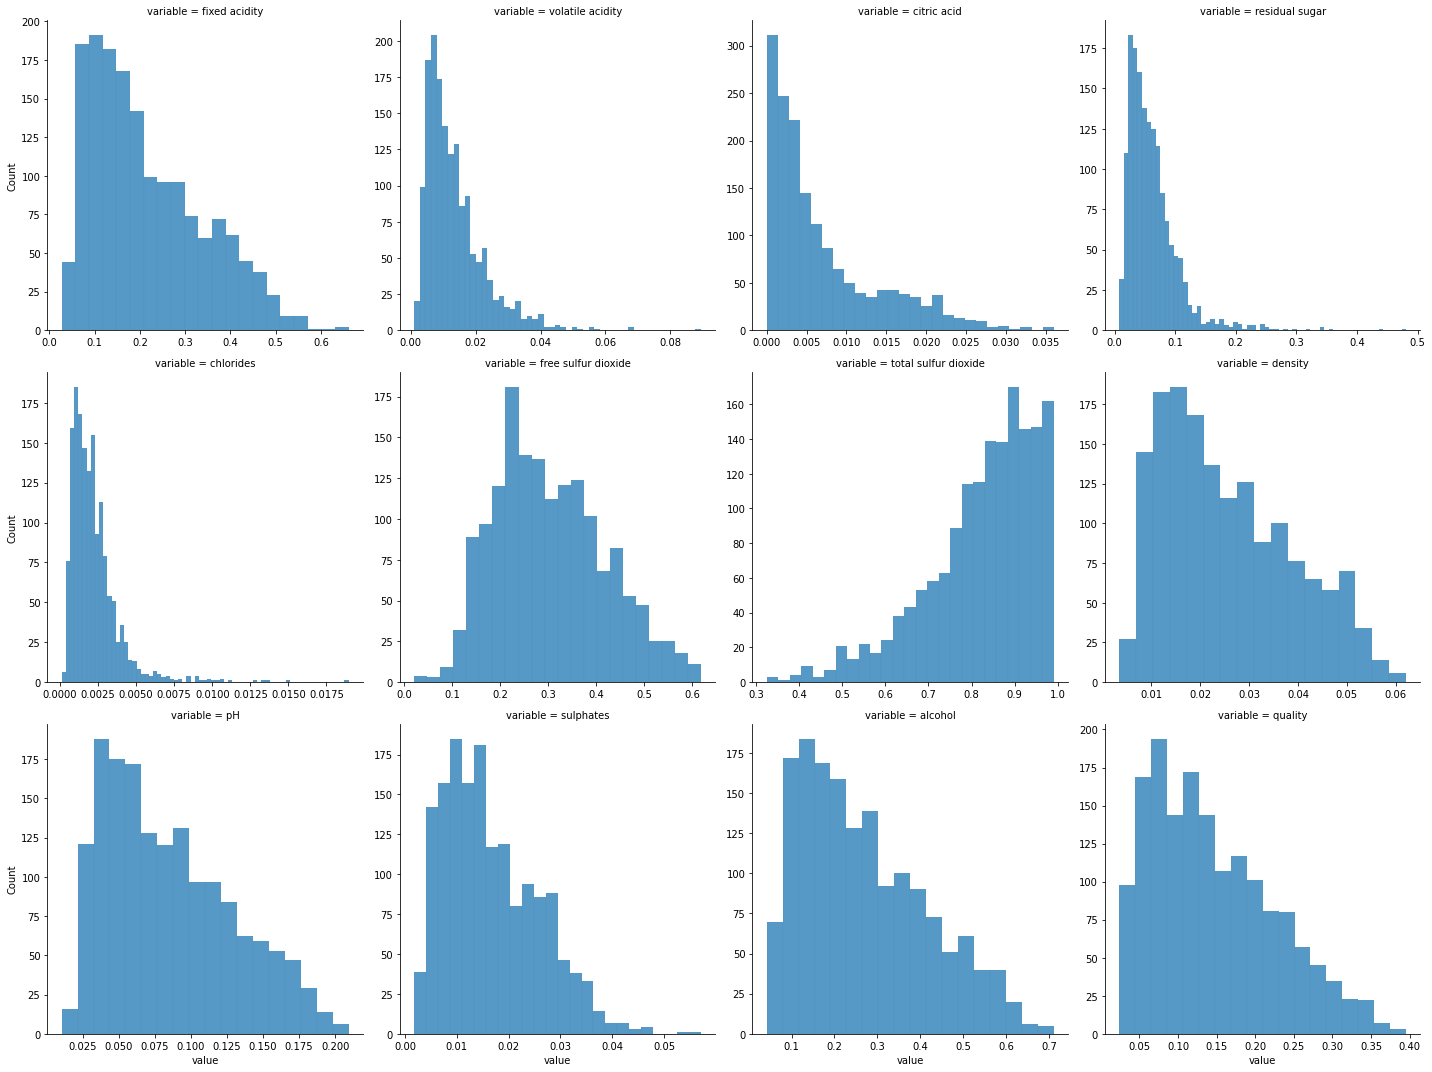

In [ ]:
sns.displot(data=df_wine_unitnorm.melt(),
            x='value',
            kind='hist',
            col='variable',
            col_wrap=4,
            common_bins=False,
            facet_kws=dict(sharex=False, sharey=False))

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Non-Linear Transform
Achieves normality of the features. Most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as _linear regression_, _logistic regression_ and _linear discriminate analysis_.

In [ ]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='box-cox', standardize=True)
df_wine_normalized = pd.DataFrame(scaler.fit_transform(df_wine + 1),
                                  columns=df_wine.columns,
                                  index=df_wine.index)

df_wine_normalized.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
690,-0.442666,2.822418,-1.531109,1.673725,0.750262,-1.342264,-1.351508,-0.069114,1.995092,-0.783598,0.480262,-3.615365
220,-0.161308,-1.100039,0.586187,-0.380998,0.127064,0.928171,0.644299,-0.175390,0.210842,-0.302088,-1.075025,0.473370
1015,1.252534,-0.751558,0.988411,-0.008633,-0.226113,0.089102,-0.449989,-0.399210,-1.672478,1.256453,1.030260,0.473370
1184,-1.000662,0.703492,-0.114550,-0.185690,0.030646,-0.268045,1.704900,-0.720461,0.339033,0.525843,0.653139,-0.777467
727,-1.269988,0.337772,-1.391443,-0.837193,-0.688299,-1.616203,-1.670569,0.142851,0.968227,0.395140,-0.921731,-0.777467


In [ ]:
df_wine_normalized.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-3.735182e-15,2.156568e-16,-8.495740e-16,2.470819e-15,-1.352750e-15,-6.932819e-17,-4.922232e-16,-3.124554e-10,-3.271304e-15,-1.338690e-15,-1.730062e-12,2.678422e-15
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-3.446389e+00,-2.957391e+00,-1.531109e+00,-5.026600e+00,-6.615453e+00,-2.940835e+00,-2.434279e+00,-3.642526e+00,-4.053284e+00,-3.993948e+00,-3.075957e+00,-3.615365e+00
25%,-6.707346e-01,-7.515576e-01,-9.298079e-01,-5.971451e-01,-5.070917e-01,-9.027894e-01,-7.355647e-01,-6.024622e-01,-6.424043e-01,-6.809851e-01,-9.217314e-01,-7.774672e-01
50%,-9.467742e-02,5.826261e-02,4.423533e-02,-8.632508e-03,-1.887634e-02,8.910225e-02,3.410318e-02,1.046475e-02,1.704430e-02,-4.784742e-02,-1.880001e-02,4.733704e-01
75%,6.594381e-01,7.034919e-01,8.138191e-01,5.565652e-01,4.800363e-01,7.153504e-01,7.415433e-01,5.828155e-01,5.930382e-01,7.079726e-01,8.128372e-01,4.733704e-01
max,2.785266e+00,3.849422e+00,2.860035e+00,2.544370e+00,2.912545e+00,2.789696e+00,3.048395e+00,3.574557e+00,4.115919e+00,2.929811e+00,2.406133e+00,2.747039e+00


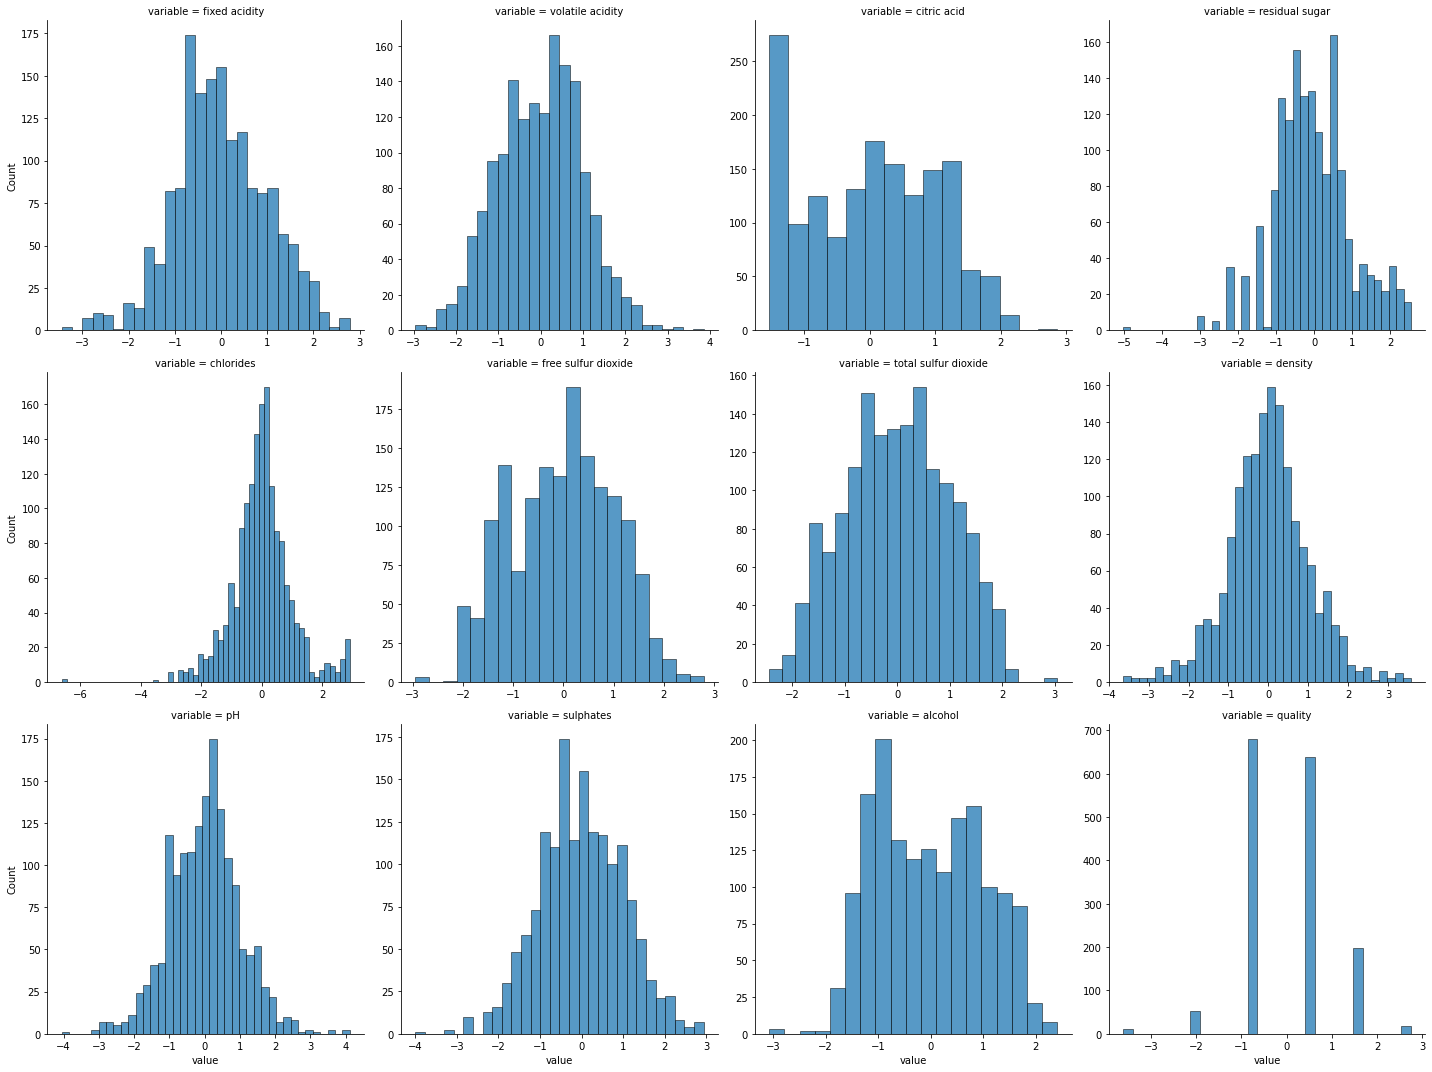

In [ ]:
sns.displot(data=df_wine_normalized.melt(),
            x='value',
            kind='hist',
            col='variable',
            col_wrap=4,
            common_bins=False,
            facet_kws=dict(sharex=False, sharey=False))

# ❓ Exercise

Clean one of the proposed datasets:
- Handle missing values
- Encode categorical variables
- Transform the variables
- Discuss your strategy
- Bonus: For the sake of exercising, you may mask some data from your dataset, with the following code

In [ ]:
def mask_data(df, percentage):
  df = df.copy()
  for i in range(int(np.product(df.shape)*percentage)):
    row, col = random.randint(0, df.shape[0] - 1), random.randint(0, df.shape[1] - 1)
    df.iloc[row, col] = np.nan
  return df

In [ ]:
df_masked = df_masked = mask_data(df_iris, 0.10)
df_masked.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
39,5.1,3.4,1.5,0.2,Iris-setosa
77,6.7,3.0,5.0,1.7,NaN
78,6.0,2.9,4.5,1.5,Iris-versicolor
72,6.3,NaN,4.9,1.5,Iris-versicolor
11,4.8,3.4,1.6,0.2,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa
17,NaN,3.5,1.4,0.3,Iris-setosa
102,NaN,3.0,5.9,2.1,Iris-virginica
76,6.8,2.8,4.8,1.4,Iris-versicolor
